In [2]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

In [3]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [15]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
print(X.shape)
print(Y.shape)


(506, 13)
(506,)


In [5]:
print(x_train.shape)
print(x_test.shape)


(354, 13)
(152, 13)


In [6]:
print(y_train.shape)
print(y_test.shape)

(354,)
(152,)


In [7]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,1.141444,-0.501335,1.049994,-0.251124,1.406060,-0.109735,0.966346,-0.775179,1.628994,1.516115,0.818709,-2.640083,0.358971,11.7
1,0.477604,-0.501335,1.049994,-0.251124,1.293122,-1.165392,1.141718,-1.091510,1.628994,1.516115,0.818709,0.447798,1.703228,12.3
2,-0.330403,0.362278,-1.029976,-0.251124,0.832682,1.126980,0.601574,-0.816172,-0.539344,-0.854874,-2.635564,0.314077,0.304571,30.7


In [9]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [10]:
n_iter=100

In [11]:
def My2CustomSGD(train_data,learning_rate,n_iter,k,divideby):
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    cur_iter=1
    while(cur_iter<=n_iter): 
#         print("LR: ",learning_rate)
        temp=train_data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        for i in range(k):
            prediction=np.dot(w,x[i])+b
#             w_gradient=w_gradient+(-2/k)*x[i]*(y[i]-(prediction))
#             b_gradient=b_gradient+(-2/k)*(y[i]-(prediction))
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        cur_iter=cur_iter+1
        learning_rate=learning_rate/divideby
    return w,b

In [12]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

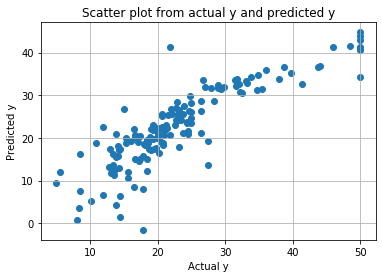

Mean Squared Error : 25.626401537222794


In [26]:
w,b=My2CustomSGD(train_data,learning_rate=0.1,n_iter=1000,divideby=1,k=50)
y_pred_customsgd_improved=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd_improved)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))

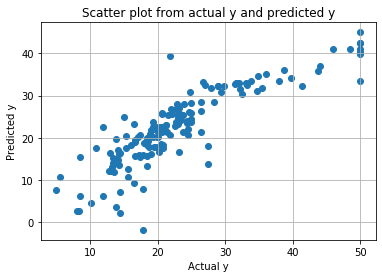

Mean Squared Error : 25.07629451149951


In [19]:
w,b=My2CustomSGD(train_data,learning_rate=0.01,n_iter=1000,divideby=1,k=10)
y_pred_customsgd=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

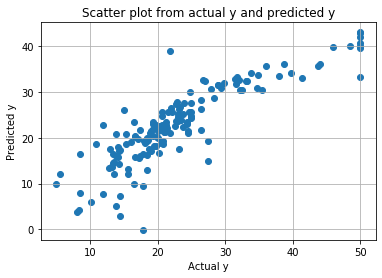

Mean Squared Error : 24.41931084844389


In [29]:
clf_ = SGDRegressor(max_iter=1000)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))